# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {답변입력}
High variance는 변동성이 높은 것으로 복잡한 모델의 경우 bia가 감소하지만 예측 값에 대한 variance가 높아져 신뢰하기 어려운 결과를 만들어냅니다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {답변입력}
High bias는 error가 높은 것으로 모델이 단순할 경우 예측값의 변동성이 크지는 않지만 실제 y값과의 차이가 많이 나기에 신뢰하기 어려운 결과를 만들어냅니다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ {답변입력}
variance가 높을 경우에는 Bagging 방식을 사용하는 것이 적합합니다. 보통 variance는 모델이 데이터에 과도하게 적합하였을 때 발생하는데, Bagging의 경우 Boostrap을 통해 다양한 데이터를 독립적인 학습기에서 학습시킵니다. 이로써, 모델 간 발생하는 에러들이 다르고 이들이 앙상블을 통해 개별적인 에러들이 상쇄됩니다. 따라서 모델의 예측을 더 안정적으로 만들고, 이는 variance를 낮추는 효과를 발생시킵니다.


- High bias problem : 🐻‍❄️ {답변입력}
bias가 높을 경우에는 Boosting 방식을 사용하는 것이 적합합니다. 보통 bias는 모델이 데이터를 제대로 학습하지 못하였을 경우 발생하는데, Boosting은 연속적으로 에러에 대한 가중치를 부과시켜 이전의 에러를 줄이는 방향으로 학습을 진행합니다. 이를 통해 데이터를 충분히 학습할 수 있고 이는 bias를 감소시키는 영향을 줍니다.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [58]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('/content/drive/MyDrive/tobigs 정규 세션/과제/3주차/BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
23
21


In [59]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df.drop('CLIENTNUM',axis=1, inplace=True)

In [63]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if col not in cat_col]

print("category =", len(cat_col))
print("numerical =", len(num_col))
print("Categorical columns:", cat_col)
print("Numerical columns:", num_col)

category = 6
numerical = 14
Categorical columns: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical columns: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


<ipython-input-64-71c9494fc94f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
<ipython-input-64-71c9494fc94f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
<ipython-input-64-71c9494fc94f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
<ipython-input-64-71c9494fc94f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
<ipython-input-64-71c9494fc94f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xti

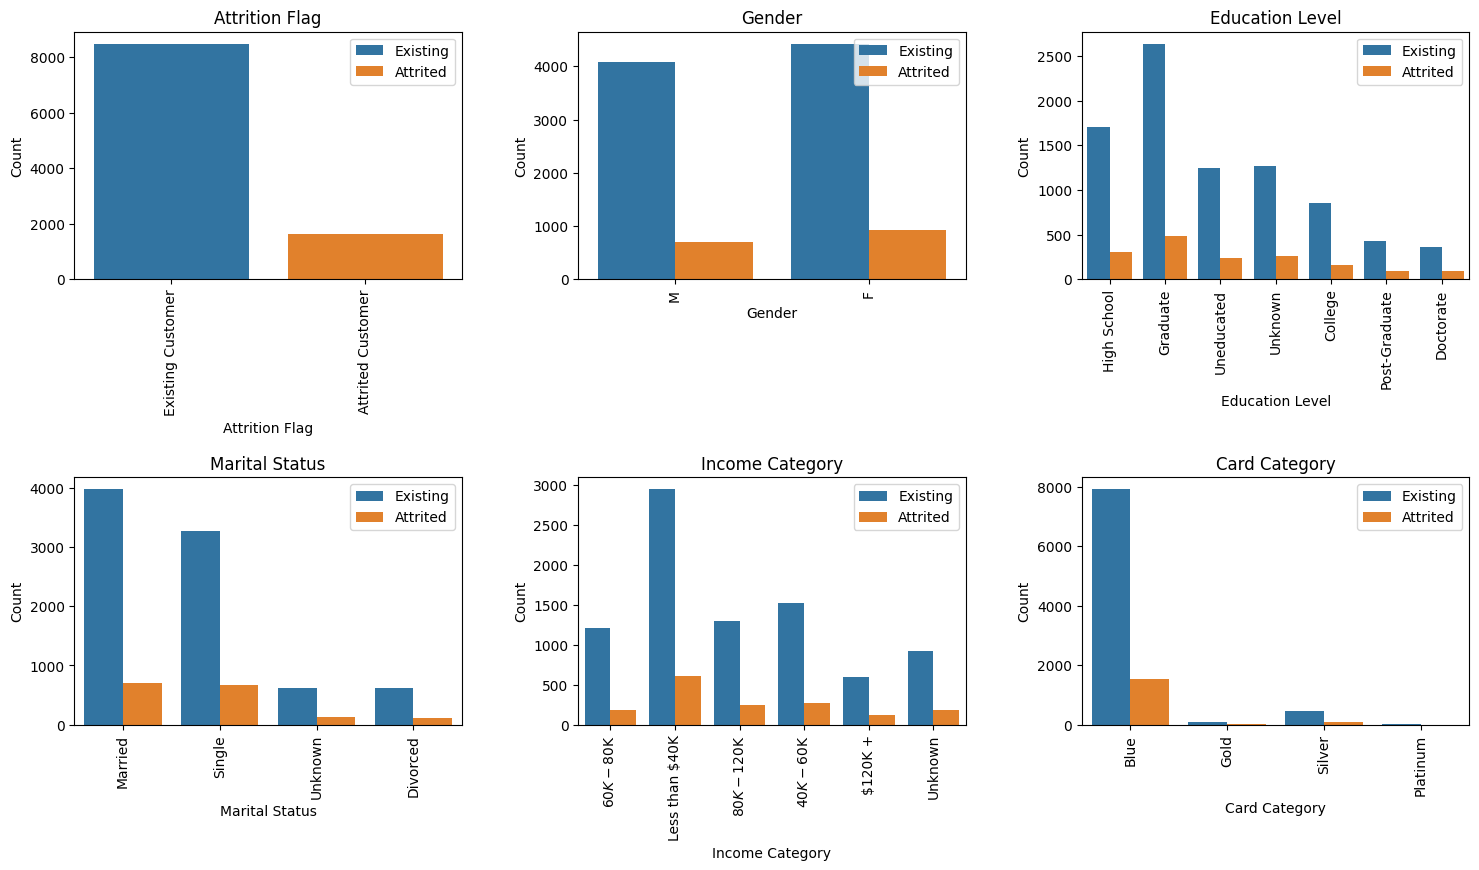

In [64]:
fig1, axarr1 = plt.subplots(2, 3, figsize=(18, 9))
plt.subplots_adjust(hspace=0.8, wspace=0.3)

# Configure new title
title_cat = ['Attrition Flag', 'Gender', 'Education Level', 'Marital Status', 'Income Category', 'Card Category']

# Generate bar chart using loop
for i, col in enumerate(cat_col):
    sns.countplot(data=df, x=df[col], hue='Attrition_Flag', ax=axarr1[i // 3][i % 3])
    axarr1[i // 3][i % 3].set_xlabel(col.replace('_', ' '))
    axarr1[i // 3][i % 3].set_ylabel('Count')
    axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
    axarr1[i // 3][i % 3].set_title(title_cat[i])
    axarr1[i // 3][i % 3].legend(['Existing','Attrited'])

plt.show()

Income, Education, Martial에 unknown 존재

In [65]:
edu_unk = (df['Education_Level'] == 'Unknown')
edu = df[edu_unk]['Attrition_Flag'].value_counts()
print("Education_Level (Unknown):",edu)

mar_unk = (df['Marital_Status'] == 'Unknown')
mar = df[mar_unk]['Attrition_Flag'].value_counts()
print("Marital_Status (Unknown):",mar)

inc_unk = (df['Income_Category'] == 'Unknown')
inc = df[inc_unk]['Attrition_Flag'].value_counts()
print("Income_Category (Unknown):",inc)

Education_Level (Unknown): Attrition_Flag
Existing Customer    1263
Attrited Customer     256
Name: count, dtype: int64
Marital_Status (Unknown): Attrition_Flag
Existing Customer    620
Attrited Customer    129
Name: count, dtype: int64
Income_Category (Unknown): Attrition_Flag
Existing Customer    925
Attrited Customer    187
Name: count, dtype: int64


<ipython-input-66-ccbd763792b8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-66-ccbd763792b8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-66-ccbd763792b8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-66-ccbd763792b8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-66-ccbd763792b8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-66-ccbd763792b8>:16: UserWarning: FixedF

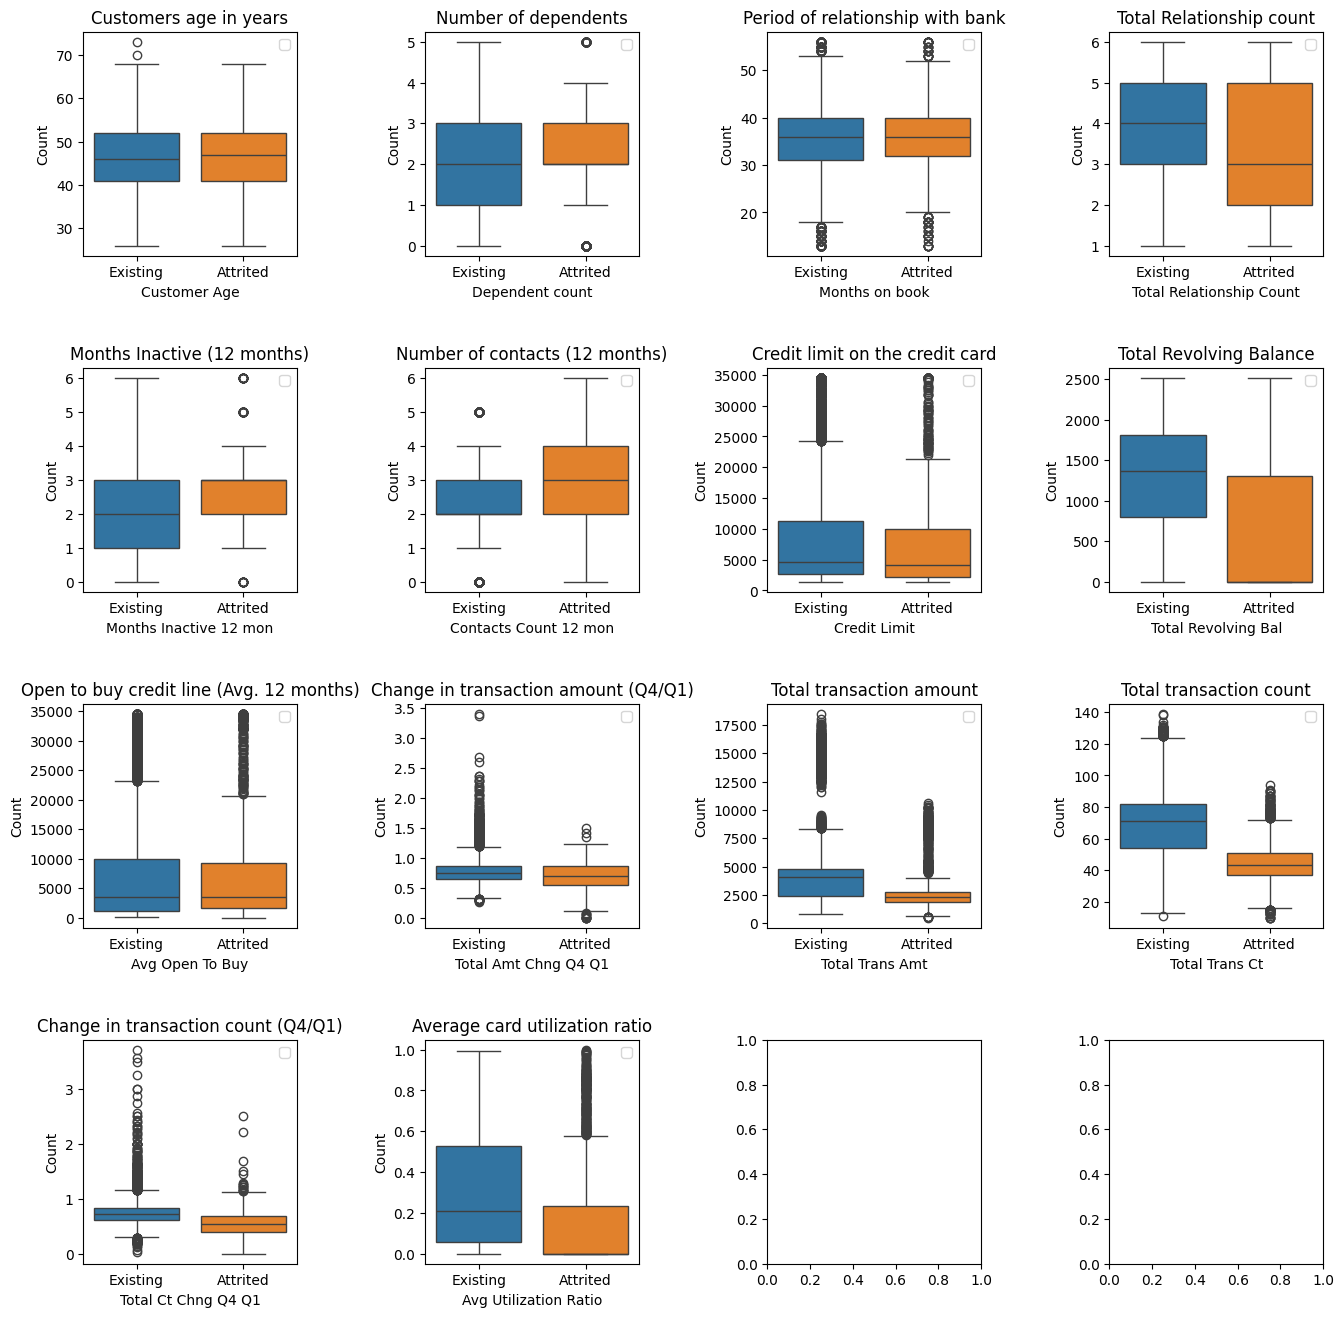

In [66]:
fig2, axarr2 = plt.subplots(4, 4, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.6)

# Configure new title
titles_num = ['Customers age in years', 'Number of dependents', 'Period of relationship with bank',
              'Total Relationship count', 'Months Inactive (12 months)', 'Number of contacts (12 months)',
              'Credit limit on the credit card', 'Total Revolving Balance', 'Open to buy credit line (Avg. 12 months)',
              'Change in transaction amount (Q4/Q1)', 'Total transaction amount', 'Total transaction count',
              'Change in transaction count (Q4/Q1)', 'Average card utilization ratio']

# Generate bar chart using loop
for i, col in enumerate(num_col):
    sns.boxplot(data=df, x=df['Attrition_Flag'], y=df[col], hue='Attrition_Flag', ax=axarr2[i // 4][i % 4])
    axarr2[i // 4][i % 4].set_xlabel(col.replace('_', ' '))
    axarr2[i // 4][i % 4].set_ylabel('Count')
    axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
    axarr2[i // 4][i % 4].set_title(titles_num[i])
    axarr2[i // 4][i % 4].legend([])

plt.show()


In [67]:
import numpy as np
from sklearn.impute import SimpleImputer

In [68]:
# Display Education level value counts before editing
print(f"Education level (Before):\n{df['Education_Level'].value_counts()}\n")

# Configure to replace Unknow values with missing values
replace_un = {'Unknown': np.nan}
df['Education_Level'].replace(replace_un, inplace=True)

# Manage missing value in Education_Level using SimpleImputer
imp1 = SimpleImputer(strategy="most_frequent")
df[['Education_Level']] = imp1.fit_transform(df[['Education_Level']])

# Display Education level value counts using impute value with mode
print(f"Education level (Impute with mode):\n{df['Education_Level'].value_counts()}\n")

# Configure to replace new variables
educt_lavel = {'Uneducated':0, 'High School':1, 'College':2,
               'Graduate':3, 'Post-Graduate':4, 'Doctorate':5}
df.replace(educt_lavel, inplace=True)

# Display Education level value counts after editing
print(f"Education level (After):\n{df['Education_Level'].value_counts()}")

Education level (Before):
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Education level (Impute with mode):
Education_Level
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Education level (After):
Education_Level
3    4647
1    2013
0    1487
2    1013
4     516
5     451
Name: count, dtype: int64


In [69]:
# Display Marital status value counts before editing
print(f"Marital status (Before):\n{df['Marital_Status'].value_counts()}\n")

# Configure to replace Unknow values with missing values
replace_un = {'Unknown': np.nan}
df['Marital_Status'].replace(replace_un, inplace=True)

# Manage missing value in Marital status using SimpleImputer
imp2 = SimpleImputer(strategy="most_frequent")
df[['Marital_Status']] = imp2.fit_transform(df[['Marital_Status']])

# Display Marital status value counts using impute value with mode
print(f"Marital status (Impute with mode):\n{df['Marital_Status'].value_counts()}\n")

# Configure to replace new variables
marital_status = {'Single':0, 'Married':1, 'Divorced':2}
df.replace(marital_status, inplace=True)

# Display Marital status value counts after editing
print(f"Marital status (After):\n{df['Marital_Status'].value_counts()}")

Marital status (Before):
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Marital status (Impute with mode):
Marital_Status
Married     5436
Single      3943
Divorced     748
Name: count, dtype: int64

Marital status (After):
Marital_Status
1    5436
0    3943
2     748
Name: count, dtype: int64


In [70]:
# Display Income category value counts before editing
print(f"Income category (Before):\n{df['Income_Category'].value_counts()}\n")

# Configure to replace Unknow values with missing values
replace_un = {'Unknown': np.nan}
df['Income_Category'].replace(replace_un, inplace=True)

# Manage missing value in Income category using SimpleImputer
imp3 = SimpleImputer(strategy="most_frequent")
df[['Income_Category']] = imp3.fit_transform(df[['Income_Category']])

# Display Income category value counts using impute value with mode
print(f"Income category (Impute with mode):\n{df['Income_Category'].value_counts()}\n")

# Configure to replace new variables
income_cat = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2,
              '$80K - $120K': 3, '$120K +': 4}
df.replace(income_cat, inplace=True)

# Display Income category value counts after editing
print(f"Income category (After):\n{df['Income_Category'].value_counts()}")

Income category (Before):
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Income category (Impute with mode):
Income_Category
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

Income category (After):
Income_Category
0    4673
1    1790
3    1535
2    1402
4     727
Name: count, dtype: int64


In [71]:
att_flag = {'Existing Customer':0, 'Attrited Customer':1}
df['Attrition_Flag'].replace(att_flag, inplace=True)

# Display attrition flag value counts after editing
print(f"Attrition Flag :\n{df['Attrition_Flag'].value_counts()}")

Attrition Flag :
Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64


In [72]:
gender = {'F':0, 'M':1}
df['Gender'].replace(gender, inplace=True)

# Display gender value counts after editing
print(f"Gender:\n{df['Gender'].value_counts()}")

Gender:
Gender
0    5358
1    4769
Name: count, dtype: int64


In [73]:
card_cat = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}
df['Card_Category'].replace(card_cat, inplace=True)

# Display Card category value counts after editing
print(f"Card category:\n{df['Card_Category'].value_counts()}")

Card category:
Card_Category
0    9436
1     555
2     116
3      20
Name: count, dtype: int64


In [74]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<Axes: >

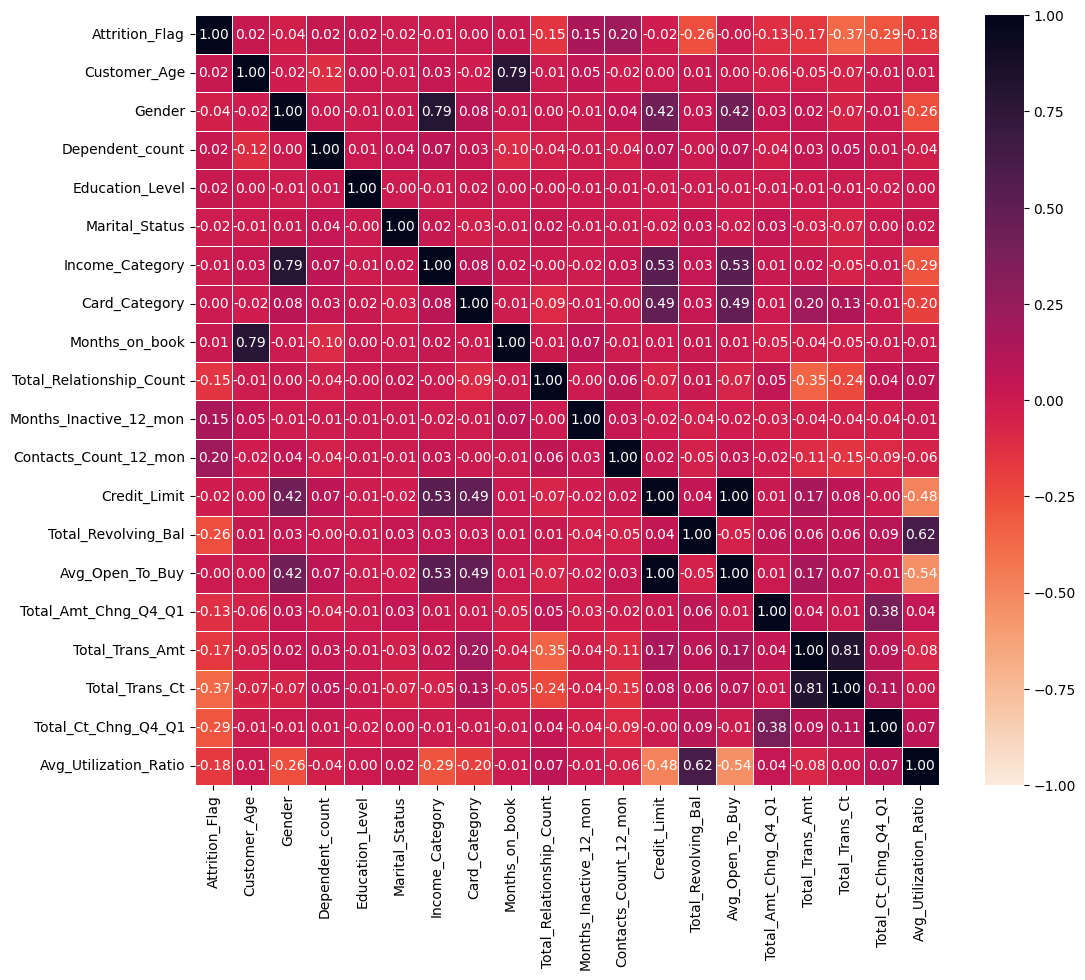

In [75]:
corr_matrix_df = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_df, vmin= -1, vmax= 1, linewidths=0.5, cmap='rocket_r', annot=True, fmt='.2f')

In [76]:
x = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=250, max_depth = 1, random_state=0)
model_rf.fit(x, y)

RandomForestClassifier(max_depth=1, n_estimators=250, random_state=0)

In [77]:
fi_rf = pd.Series(model_rf.feature_importances_, index=x.columns).sort_values(ascending=True)
fi_rf

,0
Dependent_count,0.000
Marital_Status,0.000
Income_Category,0.000
Card_Category,0.000
Months_on_book,0.000
Customer_Age,0.004
Gender,0.004
Education_Level,0.008
Avg_Open_To_Buy,0.008
Total_Relationship_Count,0.016


In [78]:
df_fi = df[fi_rf[fi_rf > 0.1].index]
df_fi.head()

,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,1.625,777,1144,42
1,3.714,864,1291,33
2,2.333,0,1887,20
3,2.333,2517,1171,20
4,2.500,0,816,28


In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_fi_scaled = pd.DataFrame(sc.fit_transform(df_fi), columns= df_fi.columns)

df_fi_scaled.head()

,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,3.834003,-0.473422,-0.959707,-0.973895
1,12.608573,-0.366667,-0.916433,-1.357340
2,6.807864,-1.426858,-0.740982,-1.911206
3,6.807864,1.661686,-0.951758,-1.911206
4,7.509325,-1.426858,-1.056263,-1.570365


In [80]:
df_scaled = pd.concat([df_fi_scaled, df[['Attrition_Flag']]], axis=1)
df_scaled.head()

,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Attrition_Flag
0,3.834003,-0.473422,-0.959707,-0.973895,0
1,12.608573,-0.366667,-0.916433,-1.357340,0
2,6.807864,-1.426858,-0.740982,-1.911206,0
3,6.807864,1.661686,-0.951758,-1.911206,0
4,7.509325,-1.426858,-1.056263,-1.570365,0


In [81]:
x = df_scaled.iloc[:,:4]
y = df_scaled['Attrition_Flag']

In [82]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Oversampling using SMOTE
x_resampled, y_resampled = smote.fit_resample(x, y)

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [85]:
#Decision Tree
param_dt_grid = {'max_features': [0.3,0.5,0.7,0.9],
                     'max_depth': [None, 10, 20, 30, 40, 50]}

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_dt_grid, cv=5, refit=True)
dt_grid.fit(x_train_res, y_train_res)

print(f"{dt_grid.best_estimator_}\n")
print(f"{dt_grid.best_params_}\n")
print(f"{dt_grid.best_score_}")

DecisionTreeClassifier(max_depth=40, max_features=0.5)

{'max_depth': 40, 'max_features': 0.5}

0.9266176470588234


In [86]:
#Random Forest
param_ranfor_grid = {'n_estimators': [100,200,300,400,500,600],
                     'max_features': [0.3,0.5,0.7,0.9],
                     'max_depth': [None, 10, 20, 30, 40, 50]}

ranfor = RandomForestClassifier(random_state=0)
ranfor_grid = GridSearchCV(ranfor, param_ranfor_grid, cv=5, refit=True)
ranfor_grid.fit(x_train_res, y_train_res)

print(f"{ranfor_grid.best_estimator_}\n")
print(f"{ranfor_grid.best_params_}\n")
print(f"{ranfor_grid.best_score_}")

KeyboardInterrupt: 

In [ ]:
#AdaBoost
param_adb_grid = {'n_estimators': [50,100,150,200,250,300],
                  'learning_rate': [0.001, 0.01, 0.1, 1],
                  'algorithm':['SAMME.R','SAMME']}

adb = AdaBoostClassifier()
adb_grid = GridSearchCV(adb, param_adb_grid, cv=5, n_jobs=-1)
adb_grid.fit(x_train_res, y_train_res)

print(f"{adb_grid.best_estimator_}\n")
print(f"{adb_grid.best_params_}\n")
print(f"{adb_grid.best_score_}")

In [ ]:
#Gradient Boosting
param_gb_grid = {'n_estimators': [50,100,150,200,250,300],
                 'learning_rate': [0.001, 0.01, 0.1, 1],
                 'max_features': [0.3,0.5,0.7,0.9],
                  'max_depth': [None, 10, 20, 30, 40, 50]}

gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb, param_gb_grid, cv=5, n_jobs=-1)
gb_grid.fit(x_train_res, y_train_res)

print(f"{gb_grid.best_estimator_}\n")
print(f"{gb_grid.best_params_}\n")
print(f"{gb_grid.best_score_}")